#### Component of a Time Series
Time series is a collection of well-defined data points obtained sequentially over a set time period, usually, taken at equal time intervals. Time series allows for the analysis of important patterns that occur such as trends and seasonality. Depending on the domain of application, time series analysis can be used in forecasting future values like GDP, unemployment rates, population, mortality rate, global temperatures, pollution levels etc. Trend (T), Seasonality(S), Cyclic variations (C) and Random or Irregular movements (I) are all components of a time series.

## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Missing values and duplicates](#Missing)
5. [Outliers](#Outliers)
6. [Feature engineering](#Engineering)
7. [Date features EDA](#Dates)
8. [Correlations - EDA](#Correlations)
9. [Preprocess test dataset](#Preprocess)
10. [Modelling](#Modelling)
11. [Making predictions of the test set and creating a submission file](#Predictions)

### 1. Importing Libraries

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

### 2. Load Data

In [8]:
df = pd.read_csv("household_power_consumption.txt", sep=";")
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [12]:
df.shape

(2075259, 9)

In [9]:
# Statistical summary
df.describe(include="all")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2.049280e+06
unique,1442,1440,6534,896,5168,377,153,145,NaN
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000,NaN
freq,1440,1442,25979,472786,25979,169406,1840611,1408274,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [11]:
# Check for missing values
df.isnull().sum().any(), df.isnull().sum()

(True,
 Date                         0
 Time                         0
 Global_active_power          0
 Global_reactive_power        0
 Voltage                      0
 Global_intensity             0
 Sub_metering_1               0
 Sub_metering_2               0
 Sub_metering_3           25979
 dtype: int64)

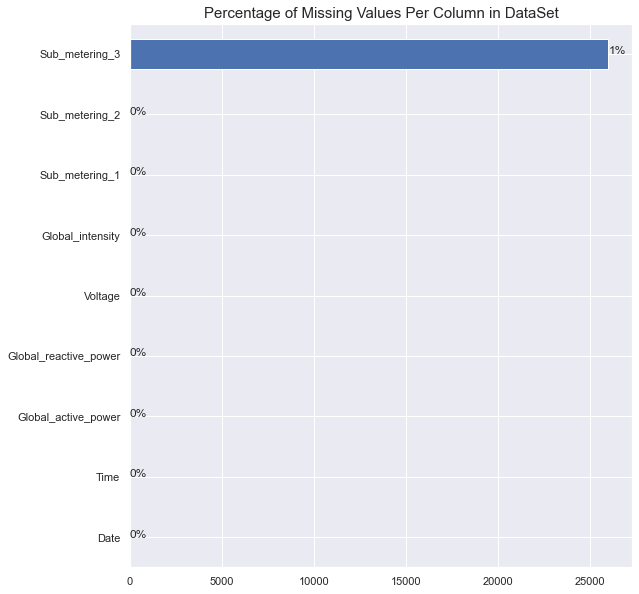

In [13]:
# Plot missing values in the Dataset
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in DataSet', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [15]:
# Check for duplicates
df.duplicated().any()

False